## Studi Kasus


Sebuah Mall ingin melakukan analisa customernya dengan cara melakukan kategorisasi customer berdasarkan Income dan Spending yang mereka habiskan selama berbelanja. Namun pihak Mall belum mengetahui berapa kategori yang harus dipakai untuk, bisakah kalian membantu pihak Mall untuk melakukan analisa ini.

## Import library yang dibutuhkan

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mall_customer.csv")
df.set_index("CustomerID",inplace=True)
df.head()

,Genre,Age,Income,Spending
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
#mengecek missing value
sum_missing = pd.isnull(df).sum()
sum_missing

Genre       0
Age         0
Income      0
Spending    0
dtype: int64

## Exploratory Data analysis (EDA)

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

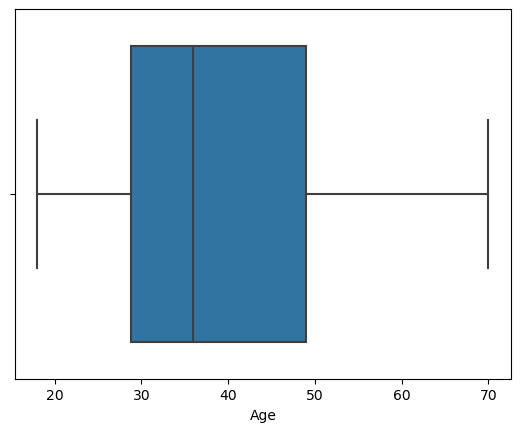

In [30]:
# melihat persebaran usia pelanggan
sns.boxplot(df["Age"])

Dari hasil boxplot diatas diperoleh, bahwa persebaran usia customer berada pada range < 20 tahun hingga 70 tahun. Dan diperoleh rata-rata usia berada pada umur 35 tahun

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending'>

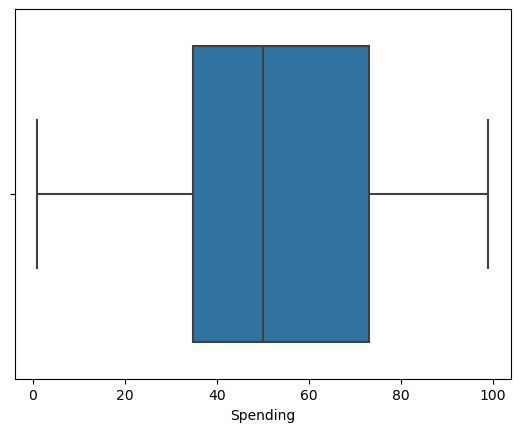

In [31]:
# melihat persebaran spending 
sns.boxplot(df["Spending"])

Diperoleh bahwa rata-rata spending adalah pada nilai 50

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

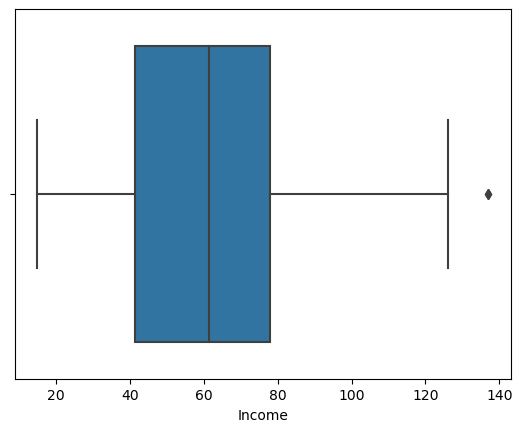

In [33]:
# melihat persebaran income
sns.boxplot(df["Income"])

Diperoleh hasil bahwa nilai rata-rata income customer berada pada nilai 60 , dan terdapat outlier nilai terbesar sendiri pada nilai 140

In [34]:
# merubah data kategori menjadi numerik (pada kasus ini genre diubah menjadi numerik)
# (Male = 1, Female = 0)
label_encoder = LabelEncoder()
categorical = ['Genre']
encoded_data = df[categorical].apply(label_encoder.fit_transform)

new_df = pd.concat([encoded_data, df[['Age','Income','Spending']]],axis=1)
new_df.head()

,Genre,Age,Income,Spending
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## KMeans Cluster

### Mementukan nilai optimal k (kelompok)



In [10]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_df)
    Sum_of_squared_error.append(km.inertia_)

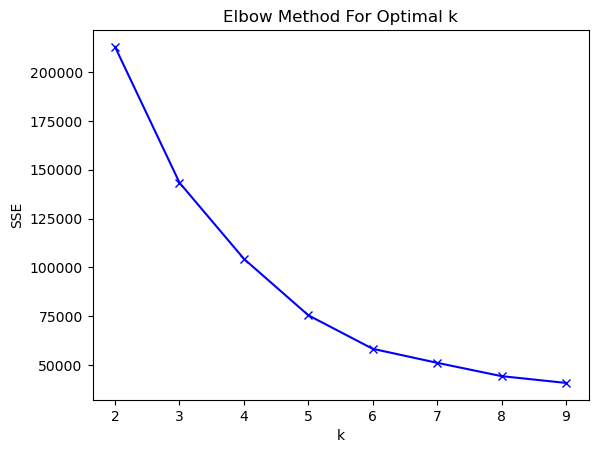

In [11]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan dari metode elbow pada titik siku-siku diperoleh di k=3 atau k =4, pada kasus ini nilai ka yang optimal menurut saya dalah 4, karena jarak antara 2 dan 3 terlalu jauh

In [12]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=4)
cluster.fit(new_df)

KMeans(n_clusters=4)

In [13]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [14]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([new_df, segment], axis=1)
results.head()

,Genre,Age,Income,Spending,segment
1,1.0,19.0,15.0,39.0,2.0
2,1.0,21.0,15.0,81.0,0.0
3,0.0,20.0,16.0,6.0,2.0
4,0.0,23.0,16.0,77.0,0.0
5,0.0,31.0,17.0,40.0,2.0


In [15]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Genre,Age,Income,Spending,segment
2,1.0,21.0,15.0,81.0,0.0
4,0.0,23.0,16.0,77.0,0.0
6,0.0,22.0,17.0,76.0,0.0
8,0.0,23.0,18.0,94.0,0.0
10,0.0,30.0,19.0,72.0,0.0


In [16]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Genre,Age,Income,Spending,segment
123,0.0,40.0,69.0,58.0,1.0
125,0.0,23.0,70.0,29.0,1.0
127,1.0,43.0,71.0,35.0,1.0
129,1.0,59.0,71.0,11.0,1.0
131,1.0,47.0,71.0,9.0,1.0


In [17]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Genre,Age,Income,Spending,segment
1,1.0,19.0,15.0,39.0,2.0
3,0.0,20.0,16.0,6.0,2.0
5,0.0,31.0,17.0,40.0,2.0
7,0.0,35.0,18.0,6.0,2.0
9,1.0,64.0,19.0,3.0,2.0


In [35]:
# Menampilkan 5 data teratas dari cluster 3
results[results["segment"]==3][:5]

,Genre,Age,Income,Spending,segment
124,1.0,39.0,69.0,91.0,3.0
128,1.0,40.0,71.0,95.0,3.0
130,1.0,38.0,71.0,75.0,3.0
132,1.0,39.0,71.0,75.0,3.0
134,0.0,31.0,72.0,71.0,3.0


<AxesSubplot:xlabel='segment', ylabel='Age'>

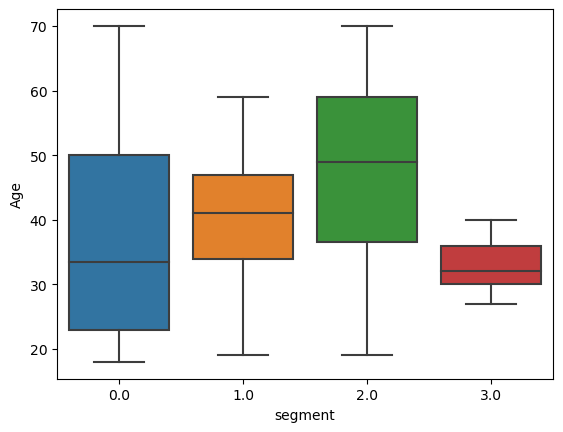

In [20]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["Age"], data=results)

Dari usia diketahui perbedaan tidak terlalu signifikan,, terlihat bahwa rata-rata berada di 35 - 48 tahun 

<AxesSubplot:xlabel='segment', ylabel='Spending'>

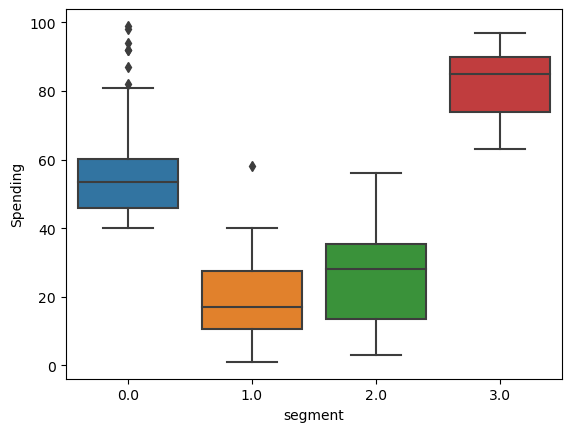

In [21]:
sns.boxplot(x=results["segment"], y=results["Spending"], data=results)

Dari hasil di atas diperoleh bahwa cluster 3 memiliki perbedaan yang cukup signifikan dimana rata-rata spending nya cukup besar pada angka 80 sekian

<AxesSubplot:xlabel='segment', ylabel='Income'>

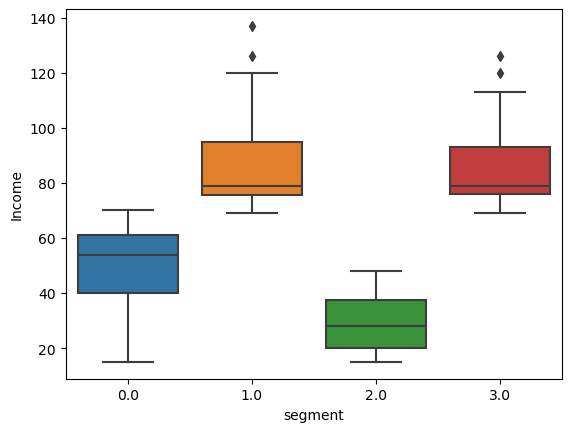

In [22]:
sns.boxplot(x=results["segment"], y=results["Income"], data=results)

Dari hasil income diatas diperoleh, untuk cluster 1 dan 3 memiliki rata-rata income yang sama, sedangkan untuk cluster 2 dan 0 memiliki rata-rata income yang berbeda, dan bahkan untuk cluster 2 memiliki income yang relatif kecil hanya berkisar di angka 25

## Hasilnya & Kesimpulan

### Berdasarkan Income

<AxesSubplot:xlabel='Age', ylabel='Income'>

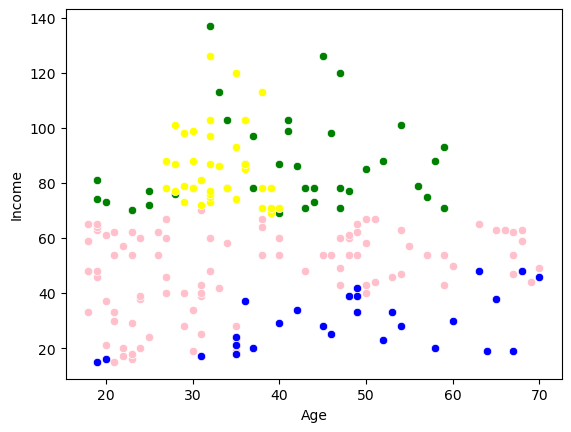

In [28]:
sns.scatterplot(x=results[results["segment"]==0].Age, y=results[results["segment"]==0].Income, color="pink")
sns.scatterplot(x=results[results["segment"]==1].Age, y=results[results["segment"]==1].Income, color="green")
sns.scatterplot(x=results[results["segment"]==2].Age, y=results[results["segment"]==2].Income, color="blue")
sns.scatterplot(x=results[results["segment"]==3].Age, y=results[results["segment"]==3].Income, color="yellow")

Dari analisa diatas berdasarkan nilai income diperoleh informasi :
- Kelompok pertama yaitu cluster 0 (warna pink) merupakan kelompok yang memiliki income yang standard atau cukup, karena rata - rata income tersebut berada  pada kisaran 20 hingga 60,
- Kelompok kedua yaitu cluster 1 (warna hijau) merupakan kelompok yang memiliki income yang paling tinggi terlihat bahwa dalam kelompok ini terdapat income sebesar 140, paling tinggi melebihi cluster 1 dan 3, Hasil ini juga memberikan informasi bahwa kelompok ini terbilang kelompok yang memiliki penghasilan yang tinggi, terlihat bahwa paling kecil income yang di peroleh adalah 80
- Kelompok ketiga yaitu cluster 2 (warna biru) merupakan kelompok yang memiliki income yang paling kecil, karena rata-rata income hanya sebesar 20 dan bahkan paling tinggi hanya sesebar 40, Informasi yang diperoleh kelompok ini adalah kelompok yang memiliki penghasilan yang rata-rata kurang
- kelompok empat yaitu cluster 3 (warna kuning) merupakan kelompok yang memiliki income yang rata-rata cukup besar, terlihat bahwa kellompok ini memiliki penghasilan sebesar 70 hingga 130

### Berdasarkan spending

<AxesSubplot:xlabel='Age', ylabel='Spending'>

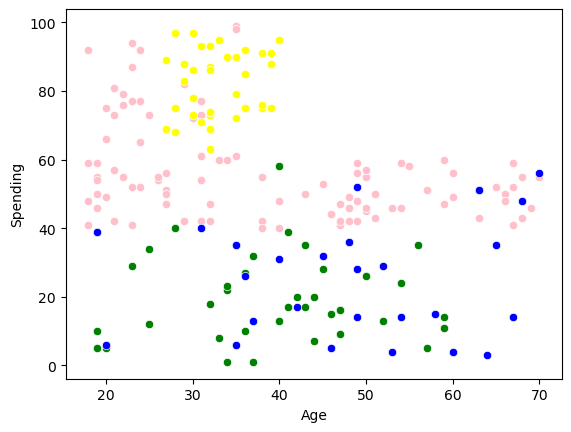

In [27]:
sns.scatterplot(x=results[results["segment"]==0].Age, y=results[results["segment"]==0].Spending, color="pink")
sns.scatterplot(x=results[results["segment"]==1].Age, y=results[results["segment"]==1].Spending, color="green")
sns.scatterplot(x=results[results["segment"]==2].Age, y=results[results["segment"]==2].Spending, color="blue")
sns.scatterplot(x=results[results["segment"]==3].Age, y=results[results["segment"]==3].Spending, color="yellow")

Dari analisa diatas berdasarkan nilai income diperoleh informasi :
- Kelompok pertama yaitu cluster 0 (warna pink) merupakan kelompok yang memiliki spending yang memiliki rata-rata niali sebesar 40 hingga 60, dan kelompok ini bahkan memiiliki nilai spending yang cukup paling tinggi, yaitu sebesar 100
- Kelompok kedua yaitu cluster 1 (warna hijau) merupakan kelompok yang memiliki spending yang relatif kecil, karena rata-rata memiliki nilai spending hanya sekitar angka 10 hingga 40 saja, dan bahkan kelompok ini memiliki nilai spending yang paling kecil
- Kelompok ketiga yaitu cluster 2 (warna biru) merupakan kelompok yang memiliki spending yang relatif kecil, dan kurang lebih memiliki karakteristik yang sama dengan cluster 1 
- kelompok empat yaitu cluster 3 (warna kuning) merupakan kelompok yang memiliki spending yang rata-rata cukup tinggi, dimana nilai spending pada kelompok ini sebesar 60 hingga 100, dengan ini kelompok 3 memiliki nilai spend yang tinggi 